In [1]:
#Import packages
import pandas as pd
import numpy as np

from SyntheticControlMethods import Synth, DiffSynth

#Import data
data_dir = "https://raw.githubusercontent.com/OscarEngelbrektson/SyntheticControlMethods/master/examples/datasets/"
data = pd.read_csv(data_dir + "german_reunification" + ".csv")
data = data.drop(columns="code", axis=1)


           Unit    Weight
0           USA  0.080884
1            UK  0.209117
2       Austria  0.072169
3       Belgium  0.143293
4       Denmark  0.015467
5        France  0.020572
6         Italy  0.079231
7   Netherlands  0.116919
8        Norway  0.015404
9   Switzerland  0.008462
10        Japan  0.018198
11       Greece  0.046802
12     Portugal  0.015253
13        Spain  0.117771
14    Australia  0.019024
15  New Zealand  0.021434
          West Germany  Synthetic West Germany     WMAPE  Importance
invest80     27.017998               23.038458  4.588169    0.464014
industry     39.689516               37.027460  3.137274    0.535986
0


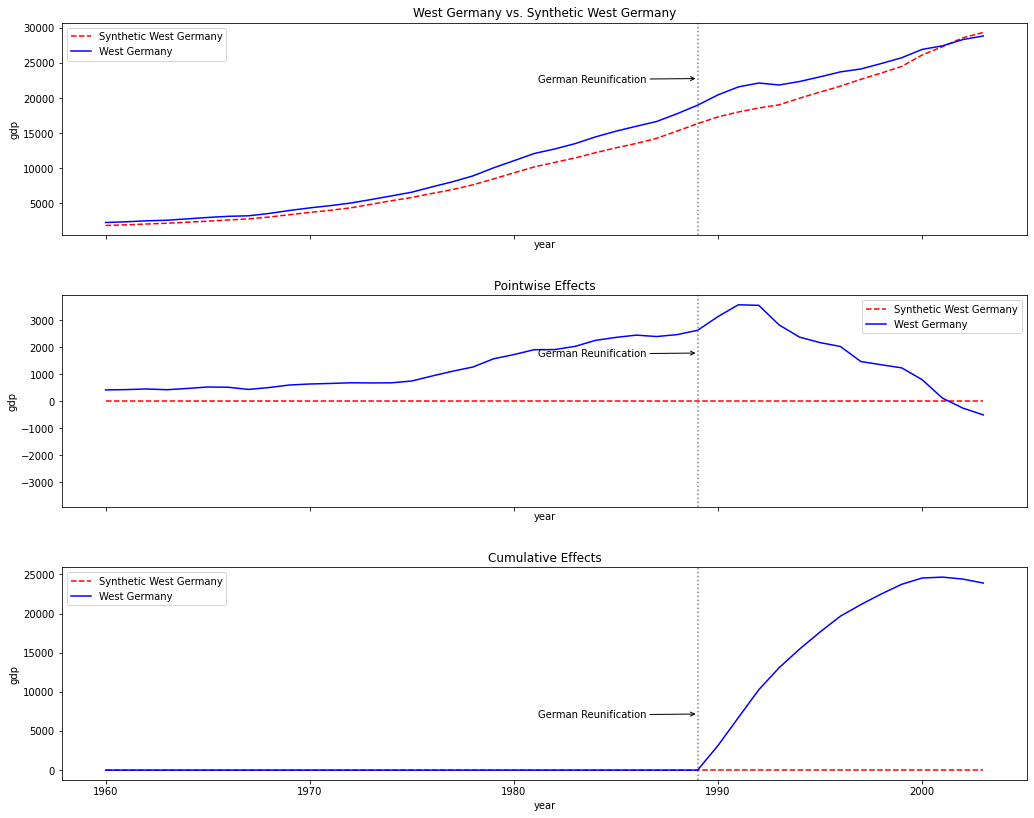

In [3]:


'''
Notes: GDP per capita, inflation rate, trade openness, and industry
share are averaged for the 1981–90 period. Investment rate and
schooling are averaged for the 1980–85 period. The last column
reports a population-weighted average for the 16 OECD countries
in the donor pool.
'''

custom_predictors = {
                    "infrate_1981_1990": ["infrate", (1981, 1990)],
                    "trade_1981_1990": ["trade", (1981, 1990)],
                    "schooling_1981_1985": ["schooling", (1980, 1985)],
                    "gdp_90": ["gdp", (1989, 1989)],
                    "gdp_85": ["gdp", (1985, 1985)],
                    "gdp_80": ["gdp", (1980, 1980)]
                    }

#Fit Synthetic Control
sc = Synth(data, "gdp", "country", "year", 1990, "West Germany", n_optim=10, 
            exclude_columns=["invest60", "invest70", "gdp", "infrate", "trade", "schooling"])
            #custom_predictors=custom_predictors)

print(sc.original_data.weight_df)
print(sc.original_data.comparison_df)
print(sc.original_data.pen)

#Visualize
sc.plot(["original", "pointwise", "cumulative"], treated_label="West Germany", 
            synth_label="Synthetic West Germany", treatment_label="German Reunification")

In [4]:


'''
Notes: GDP per capita, inflation rate, trade openness, and industry
share are averaged for the 1981–90 period. Investment rate and
schooling are averaged for the 1980–85 period. The last column
reports a population-weighted average for the 16 OECD countries
in the donor pool.
'''

custom_predictors = {
                    "infrate_1981_1990": ["infrate", (1981, 1990)],
                    "trade_1981_1990": ["trade", (1981, 1990)],
                    "schooling_1981_1985": ["schooling", (1980, 1985)],
                    "gdp_90": ["gdp", (1989, 1989)],
                    "gdp_85": ["gdp", (1985, 1985)],
                    "gdp_80": ["gdp", (1980, 1980)]
                    }

#Fit Synthetic Control
sc = Synth(data, "gdp", "country", "year", 1990, "West Germany", n_optim=3, 
            exclude_columns=["invest60", "invest70", "gdp", "infrate", "trade", "schooling"],
            custom_predictors=custom_predictors)

print(sc.original_data.weight_df)
print(sc.original_data.comparison_df)
print(sc.original_data.pen)

           Unit    Weight
0           USA  0.080914
1            UK  0.208327
2       Austria  0.072248
3       Belgium  0.142952
4       Denmark  0.015869
5        France  0.020946
6         Italy  0.079270
7   Netherlands  0.116742
8        Norway  0.015228
9   Switzerland  0.008654
10        Japan  0.017982
11       Greece  0.047027
12     Portugal  0.015650
13        Spain  0.117590
14    Australia  0.018797
15  New Zealand  0.021803
          West Germany  Synthetic West Germany     WMAPE  Importance
invest80     27.017998               23.043177  4.578859     0.46756
industry     39.689516               37.015480  3.147047     0.53244
0


In [ ]:
#In-time placebo
#Placebo treatment period is 1982, 8 years earlier
sc.in_time_placebo(1982)

#Visualize
sc.plot(['in-time placebo'], 
            treated_label="West Germany",
            synth_label="Synthetic West Germany")

In [ ]:

#Compute in-space placebos
sc.in_space_placebo(1)
sc.plot(["rsmpe ratio"])